# Regression and Classification

## OUTLINE: 

Data pre-processing, regression task and classification task

1. Reading the files
2. Missing Values
3. Imputing categorical variables
4. Imputing numerical variables
5. Classification with Decision Tree, single split
6. Classification with Decision Tree, Cross validation
7. Interpretation of the results

In [34]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap


RSEED = 8

## *1.* Reading the files

### `Task: Read the datasets using pandas. Use the files called cleveland.data and switzerland.data that you have downloaded in this archive.`

The datasets contain information about adult patients from the US and from Switzerland. You can find more information in the heart-disease.names file in the 'data' folder.

In [35]:
# From the folder 'data', read the files cleveland.data and switzerland.data into the dataframes cleveland and test, respectively.
# Make sure to add the names of the variables to both dataframes.

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'class'] # you can find the column names in the file 'data/heart-disease.names'.
# Select the correct column names for the dataset, as described in the file.

cleveland = pd.read_csv("../data/cleveland.data", names=columns)  # change this
test = pd.read_csv("../data/switzerland.data", names=columns)       # change this

In [36]:
# do not delete this!
cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [37]:
# do not delete this!
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,32.0,1.0,1.0,95.0,0.0,?,0,127.0,0.0,0.7,1,?,?,1.0
1,34.0,1.0,4.0,115.0,0.0,?,?,154.0,0.0,0.2,1,?,?,1.0
2,36.0,1.0,4.0,110.0,0.0,?,0,125.0,1.0,1.0,2,?,6,1.0
3,38.0,0.0,4.0,105.0,0.0,?,0,166.0,0.0,2.8,1,?,?,2.0
4,38.0,0.0,4.0,110.0,0.0,0,0,156.0,0.0,0.0,2,?,3,1.0


In [38]:
# if you want to see information about the dataset, uncomment:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,60.270627,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,77.296578,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,0.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,999.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [39]:
# if you want to see information about the dataset, uncomment:
test.describe()


,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,class
count,122.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,117.000000
mean,82.409836,0.914530,3.683761,129.957265,0.0,122.299145,0.435897,0.653846,1.769231
std,170.211621,0.280782,0.702822,22.423200,0.0,25.759921,0.498007,1.056061,1.011866
min,0.000000,0.000000,1.000000,80.000000,0.0,60.000000,0.000000,-2.600000,0.000000
25%,48.500000,1.000000,4.000000,115.000000,0.0,105.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,121.000000,0.000000,0.300000,2.000000
75%,61.000000,1.000000,4.000000,145.000000,0.0,141.000000,1.000000,1.500000,3.000000
max,999.000000,1.000000,4.000000,200.000000,0.0,182.000000,1.000000,3.700000,4.000000


## *2.* Missing values

### `Task: Produce a plot with two subplots, each showing a bar plot of the 'missing' values (either encoded as NaN, or encoded with values that should not be in the dataset) for each feature for the two dataframes. The plot must have a name, and the bars must be named using the feature names.`

age         4
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        7
class       0
dtype: int64

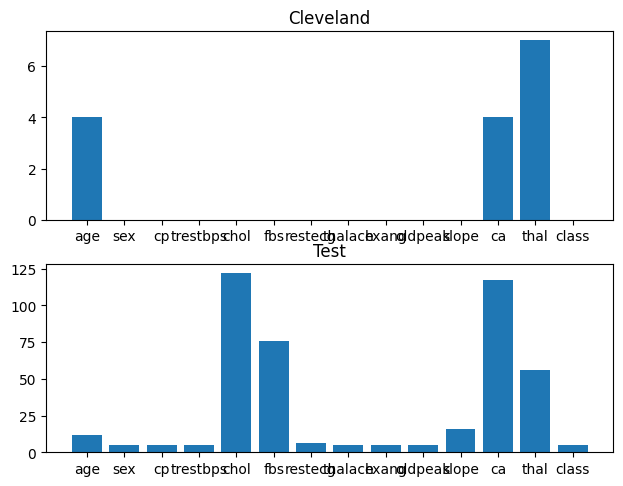

In [40]:
# Create 1 figure with a set of 2 subplots. Each axes should contain a figure as described below: 
# subplot 1: A barplot with the missing valies for each attribute in the dataset 'cleveland'
# subplot 2: A barplot with the missing valies for each attribute in the dataset 'test'

# Write your code here
b_limpia_cleveland = pd.DataFrame(cleveland)
b_limpia_test = pd.DataFrame(test)

b_limpia_cleveland.replace('?', np.nan, inplace=True)
b_limpia_cleveland.replace('!', np.nan, inplace=True)
b_limpia_cleveland['age'] = b_limpia_cleveland['age'].replace(0, np.nan)
b_limpia_cleveland['age'] = b_limpia_cleveland['age'].replace(999, np.nan)

b_limpia_test.replace('?', np.nan, inplace=True)
b_limpia_test.replace('!', np.nan, inplace=True)
b_limpia_test['age'] = b_limpia_test['age'].replace(0, np.nan)
b_limpia_test['age'] = b_limpia_test['age'].replace(999, np.nan)
b_limpia_test['chol'] = b_limpia_test['chol'].replace(0, np.nan)


b_limpia_cleveland
b_limpia_test

fig, ax = plt.subplots(2, 1)
plt.tight_layout()
ax[0].set_title("Cleveland")
ax[0].bar(x = columns, height = b_limpia_cleveland.isna().sum())

ax[1].set_title("Test")
ax[1].bar(x = columns, height = b_limpia_test.isna().sum())


b_limpia_cleveland.isnull().sum()

NOTE: In the following section of the code, I eliminated the last five rows of the test set as they contain only missing values.

In [41]:
b_limpia_test = b_limpia_test[:-5]
b_limpia_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,32.0,1.0,1.0,95.0,NaN,NaN,0,127.0,0.0,0.7,1,NaN,NaN,1.0
1,34.0,1.0,4.0,115.0,NaN,NaN,NaN,154.0,0.0,0.2,1,NaN,NaN,1.0
2,36.0,1.0,4.0,110.0,NaN,NaN,0,125.0,1.0,1.0,2,NaN,6,1.0
3,38.0,0.0,4.0,105.0,NaN,NaN,0,166.0,0.0,2.8,1,NaN,NaN,2.0
4,38.0,0.0,4.0,110.0,NaN,0,0,156.0,0.0,0.0,2,NaN,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,70.0,1.0,4.0,115.0,NaN,0,1,92.0,1.0,0.0,2,NaN,7,1.0
113,70.0,1.0,4.0,140.0,NaN,1,0,157.0,1.0,2.0,2,NaN,7,3.0
114,72.0,1.0,3.0,160.0,NaN,NaN,2,114.0,0.0,1.6,2,2,NaN,0.0
115,73.0,0.0,3.0,160.0,NaN,0,1,121.0,0.0,0.0,1,NaN,3,1.0


## *3.* Imputing categorical variables

In the file 'data/heart-disease.names' you can find, together with the names of the columns, a description of their contents.

Determine which columns are categorical, and set their type to object.

Determine which columns are numerical, and set their type accordingly.

In [42]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal']        # change this
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']      # change this

b_limpia_cleveland[categorical_columns] = b_limpia_cleveland[categorical_columns].astype("object")
b_limpia_test[categorical_columns] = b_limpia_test[categorical_columns].astype("object")

b_limpia_cleveland["class"] = b_limpia_cleveland["class"].astype("object")
b_limpia_test["class"] = b_limpia_test["class"].astype("object")

print(b_limpia_cleveland.dtypes)
print(b_limpia_test.dtypes)

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
class        object
dtype: object
age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
class        object
dtype: object


### ` Task: Split the cleveland dataframe in a train and a validation set. `

The train set must be called train, the the validation set must be called val. The size of the validation set must be 30% of the total size of the cleveland dataframe. Use shuffle=True and stratify=True. Make sure that both train and val are dataframes, and that the columns have the correct names. Reset the indexes of all four the dataframes, using drop=True.

In [43]:
# Split the data into X and y, where X contains the features and y contains the target variable.
X_cleveland = pd.DataFrame(b_limpia_cleveland[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])  # change this
y_cleveland = pd.DataFrame(b_limpia_cleveland['class'])  # change this

X_test = pd.DataFrame(b_limpia_test[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])       # change this
y_test = pd.DataFrame(b_limpia_test['class'])       # change this

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_cleveland, y_cleveland, test_size=0.3, random_state=8, stratify=y_cleveland, shuffle=True)

X_train = pd.DataFrame(X_train.reset_index(drop=True))
X_val = pd.DataFrame(X_val.reset_index(drop=True))
y_train = pd.DataFrame(y_train.reset_index(drop=True))
y_val = pd.DataFrame(y_val.reset_index(drop=True))


In [45]:
# DO NOT DELETE/CHANGE THIS CELL
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,55.0,0.0,4.0,180.0,327.0,0.0,1.0,117.0,1.0,3.4,2.0,0.0,3.0
1,39.0,0.0,3.0,94.0,199.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0
2,62.0,0.0,3.0,130.0,263.0,0.0,0.0,97.0,0.0,1.2,2.0,1.0,7.0
3,66.0,0.0,3.0,146.0,278.0,0.0,2.0,152.0,0.0,0.0,2.0,1.0,3.0
4,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0


In [46]:
# DO NOT DELETE/CHANGE THIS CELL
X_val.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,NaN,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0
1,57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0
2,60.0,0.0,3.0,120.0,178.0,1.0,0.0,96.0,0.0,0.0,1.0,0.0,3.0
3,68.0,0.0,3.0,120.0,211.0,0.0,2.0,115.0,0.0,1.5,2.0,0.0,3.0
4,64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.0,3.0


In [47]:
# To make the classification task easier, transform the target variable into a binary variable.
# If the target variable is 0, it should remain 0. If the target variable is different from 0, it should be transformed into 1.
y_train.replace({2: 1, 3: 1, 4:1}, inplace=True)
y_val.replace({2: 1, 3: 1, 4:1}, inplace=True)    # change this
y_test.replace({2: 1, 3: 1, 4:1}, inplace=True)   # change this

C:\Users\Asus\AppData\Local\Temp\ipykernel_15336\3649070253.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train.replace({2: 1, 3: 1, 4:1}, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_15336\3649070253.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_val.replace({2: 1, 3: 1, 4:1}, inplace=True)    # change this
C:\Users\Asus\AppData\Local\Temp\ipykernel_15336\3649070253.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, e

In [48]:
# DO NOT DELETE/CHANGE THIS CELL

'''
train_set_from_franco = pd.read_csv('../../../testing_data/train.csv')
val_set_from_franco = pd.read_csv('../../../testing_data/val.csv')

assert train.equals(train_set_from_franco), 'train set is not correct'
assert val.equals(val_set_from_franco), 'validation set is not correct'
'''


"\ntrain_set_from_franco = pd.read_csv('../../../testing_data/train.csv')\nval_set_from_franco = pd.read_csv('../../../testing_data/val.csv')\n\nassert train.equals(train_set_from_franco), 'train set is not correct'\nassert val.equals(val_set_from_franco), 'validation set is not correct'\n"

### ` Task: impute the missing values in the categorical columns. Use a KNNImputer from sklearn for the imputation process. `

In [49]:
# 1. Create a subset of the train dataset with only the categorical columns. Call this subset train_cat.
# 2. Create a subset of the val dataset with only the categorical columns. Call this subset val_cat.
# 3. Create a subset of the test dataset with only the categorical columns. Call this subset test_cat
# 4. Impute the three datasets using a KNN imputer with k=5 and weights set to distance
# 5. Save the results in train_imputed_knn, val_imputed_knn, and test_imputed_knn.
# 6. Make sure to add the column names to the resulting dataframes. DO NOT SKIP THIS STEP.
# The new values might have new values that are not in the original dataset.
# Approximate them to the nearest value in the original dataset, for each column.
# To do so, you can store the original values of each column in a dictionary or a list.
# if a new value is equidistant from two original values, choose the largest one.
# (Example: if the original values are [1, 3] and the new value is 2, it will become 3)

from sklearn.impute import KNNImputer

# Write your code here
train_cat = X_train[categorical_columns]
val_cat = X_val[categorical_columns]
test_cat = X_test[categorical_columns]

imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='distance')

imputer.fit(train_cat)

train_imputed_knn = pd.DataFrame(imputer.transform(train_cat), columns=categorical_columns)  # change this
val_imputed_knn = pd.DataFrame(imputer.transform(val_cat), columns=categorical_columns)    # change this
test_imputed_knn = pd.DataFrame(imputer.transform(test_cat), columns=categorical_columns)   # change this

ca_values = np.array([0,1,2,3])
thal_values = np.array([3,6,7])

def ca_impute(val):
    return ca_values[np.argmin(np.abs(ca_values - val))]

def thal_impute(val):
    return thal_values[np.argmin(np.abs(thal_values - val))]

train_imputed_knn['ca'] = train_imputed_knn['ca'].apply(ca_impute)
train_imputed_knn['thal'] = train_imputed_knn['thal'].apply(thal_impute)

val_imputed_knn['ca'] = val_imputed_knn['ca'].apply(ca_impute)
val_imputed_knn['thal'] = val_imputed_knn['thal'].apply(thal_impute)

test_imputed_knn['ca'] = test_imputed_knn['ca'].apply(ca_impute)
test_imputed_knn['thal'] = test_imputed_knn['thal'].apply(thal_impute)



In [50]:
# DO NOT DELETE/CHANGE THIS CELL
'''
train_imp_knn_franco = pd.read_csv('../../../testing_data/train_imp_knn.csv')
val_imp_knn_franco = pd.read_csv('../../../testing_data/val_imp_knn.csv')
test_imp_knn_franco = pd.read_csv('../../../testing_data/test_imp_knn.csv')

assert train_imputed_knn.equals(train_imp_knn_franco), 'train imputed knn is not correct'
assert val_imputed_knn.equals(val_imp_knn_franco), 'val imputed knn is not correct'
assert test_imputed_knn.equals(test_imp_knn_franco), 'test imputed knn is not correct'
'''

"\ntrain_imp_knn_franco = pd.read_csv('../../../testing_data/train_imp_knn.csv')\nval_imp_knn_franco = pd.read_csv('../../../testing_data/val_imp_knn.csv')\ntest_imp_knn_franco = pd.read_csv('../../../testing_data/test_imp_knn.csv')\n\nassert train_imputed_knn.equals(train_imp_knn_franco), 'train imputed knn is not correct'\nassert val_imputed_knn.equals(val_imp_knn_franco), 'val imputed knn is not correct'\nassert test_imputed_knn.equals(test_imp_knn_franco), 'test imputed knn is not correct'\n"

## *4.* Imputing numerical variables

### ` Task: impute the missing values in the numerical columns. Use a Lasso Regression from sklearn for the imputation process. `
If more than one column contains missing values, proceed in increasing order: the lowest number of missing values first, then the second lowest, then the third ...

Exclude the columns with missing values when fitting your regressor: only train on columns without missing values. After a column has been imputed, it can be used to fit the regressor in the next step.

In [51]:
# 1. Create a subset of the train dataset with only the numerical columns. Call this subset train_num.
# 2. Create a subset of the val dataset with only the numerical columns. Call this subset val_num.
# 3. Create a subset of the test dataset with only the numerical columns. Call this subset test_num.
# 4a. Create a subset of train_num containing the rows with missing values. Call this subset train_num_missing.
# 4b. Create a subset of train_num containing the rows without missing values. Call this subset train_num_not_missing.
# 5a. Create a subset of val_num containing the rows with missing values. Call this subset val_num_missing.
# 5b. Create a subset of val_num containing the rows without missing values. Call this subset val_num_not_missing.
# 6a. Create a subset of test_num containing the rows with missing values. Call this subset test_num_missing.
# 6b. Create a subset of test_num containing the rows without missing values. Call this subset test_num_not_missing.
# 7. Using a Lasso regression, impute the missing values in train_num_missing, val_num_missing, and test_num_missing.
# On what should the Lasso regression be trained?
# 8. Repeat steps 1-7 until all the missing values are imputed.
# 9. Save the results in train_num_imputed_lasso, val_num_imputed_lasso, and test_num_imputed_lasso.
# 10. Concatenate the imputed subsets with the subsets that did not contain missing values.
# 11. Save the resulting datasets in train_imputed_lasso, val_imputed_lasso, and test_imputed_lasso.
# IMPORTANT: The order of the rows should be the same as in the original datasets.

from sklearn.linear_model import Lasso

# Write your code here
train_num = X_train[numerical_columns]
val_num = X_val[numerical_columns]
test_num = X_test[numerical_columns]

train_num_missing = train_num[train_num.isnull().any(axis=1)]
train_num_not_missing = train_num[~train_num.isnull().any(axis=1)]

val_num_missing = val_num[val_num.isnull().any(axis=1)]
val_num_not_missing = val_num[~val_num.isnull().any(axis=1)]

test_num['chol'] = test_num['chol'].replace(np.nan, 0)
test_num_missing = test_num[test_num.isnull().any(axis=1)]
test_num_not_missing = test_num[~test_num.isnull().any(axis=1)]

imputer = Lasso()
imputer.fit(train_num_not_missing[['trestbps', 'chol', 'thalach', 'oldpeak']], train_num_not_missing['age'])

def lass_impute(to_impute):
        z = to_impute[['trestbps', 'chol', 'thalach', 'oldpeak']]
        imputed = imputer.predict(z)
        result = to_impute.copy()
        result['age'] = imputed
        return result

train_num_imputed_lasso = lass_impute(train_num_missing)
            
train_imputed_lasso = pd.DataFrame(pd.concat([train_num_not_missing, train_num_imputed_lasso]).sort_index())

val_num_imputed_lasso = lass_impute(val_num_missing)
            
val_imputed_lasso = pd.DataFrame(pd.concat([val_num_not_missing, val_num_imputed_lasso]).sort_index())

test_num_imputed_lasso = lass_impute(test_num_missing)
            
test_imputed_lasso = pd.DataFrame(pd.concat([test_num_not_missing, test_num_imputed_lasso]).sort_index())


C:\Users\Asus\AppData\Local\Temp\ipykernel_15336\4163606194.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_num['chol'] = test_num['chol'].replace(np.nan, 0)


In [52]:
# DO NOT DELETE/CHANGE THIS CELL
'''
train_imp_lasso_franco = pd.read_csv('../../../testing_data/train_imp_lasso.csv')
val_imp_lasso_franco = pd.read_csv('../../../testing_data/val_imp_lasso.csv')
test_imp_lasso_franco = pd.read_csv('../../../testing_data/test_imp_lasso.csv')

assert train_imputed_lasso.equals(train_imp_lasso_franco), 'train imputed lasso is not correct'
assert val_imputed_lasso.equals(val_imp_lasso_franco), 'val imputed lasso is not correct'
assert test_imputed_lasso.equals(test_imp_lasso_franco), 'test imputed lasso is not correct'
'''

"\ntrain_imp_lasso_franco = pd.read_csv('../../../testing_data/train_imp_lasso.csv')\nval_imp_lasso_franco = pd.read_csv('../../../testing_data/val_imp_lasso.csv')\ntest_imp_lasso_franco = pd.read_csv('../../../testing_data/test_imp_lasso.csv')\n\nassert train_imputed_lasso.equals(train_imp_lasso_franco), 'train imputed lasso is not correct'\nassert val_imputed_lasso.equals(val_imp_lasso_franco), 'val imputed lasso is not correct'\nassert test_imputed_lasso.equals(test_imp_lasso_franco), 'test imputed lasso is not correct'\n"

## *5.* Classification with Decision Tree, using a single split 

In [53]:
# Merge the train_imputed_knn and train_imputed_lasso datasets. Call the resulting dataset X_train_imputed.
# Merge the val_imputed_knn and val_imputed_lasso datasets. Call the resulting dataset X_val_imputed.
# Merge the test_imputed_knn and test_imputed_lasso datasets. Call the resulting dataset X_test_imputed.

# Write your code here

X_train_imputed = pd.DataFrame(train_imputed_lasso.merge(train_imputed_knn, right_index=True, left_index=True).sort_index())  # change this
X_val_imputed = pd.DataFrame(val_imputed_lasso.merge(val_imputed_knn, right_index=True, left_index=True).sort_index())   # change this
X_test_imputed = pd.DataFrame(test_imputed_lasso.merge(test_imputed_knn, right_index=True, left_index=True).sort_index())   # change this

X_test_imputed

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,32.0,95.0,0.0,127.0,0.7,1.0,1.0,0.200000,0.0,0.0,1.0,0,6
1,34.0,115.0,0.0,154.0,0.2,1.0,4.0,0.200000,0.8,0.0,1.0,1,6
2,36.0,110.0,0.0,125.0,1.0,1.0,4.0,0.250000,0.0,1.0,2.0,0,6
3,38.0,105.0,0.0,166.0,2.8,0.0,4.0,0.000000,0.0,0.0,1.0,0,3
4,38.0,110.0,0.0,156.0,0.0,0.0,4.0,0.000000,0.0,0.0,2.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,70.0,115.0,0.0,92.0,0.0,1.0,4.0,0.000000,1.0,1.0,2.0,1,7
113,70.0,140.0,0.0,157.0,2.0,1.0,4.0,1.000000,0.0,1.0,2.0,0,7
114,72.0,160.0,0.0,114.0,1.6,1.0,3.0,0.212445,2.0,0.0,2.0,2,6
115,73.0,160.0,0.0,121.0,0.0,0.0,3.0,0.000000,1.0,0.0,1.0,0,3


### ` Task: Train a set of Decision Trees, using different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [54]:
# 1. Create a dictionary to contain the hyperparameters. The dictionary should contain the following:
# - criterion: 'gini' and 'entropy'
# - max_depth: 3, 5, and 7
# - min_samples_split: 2, 5, and 10
# 2. Create a dictionary called performance to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the hyperparameters from the dictionary.
# 4. Create a for loop to iterate over the combinations of hyperparameters.
# 5. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation set.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary.

from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import time

hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

performance = {}

param_grid = ParameterGrid(hyperparameters)

start = time.time() # DO NOT CHANGE/DELETE THIS LINE

for parameters in param_grid: # change this
    tree = DecisionTreeClassifier(
        criterion=parameters['criterion'],
        max_depth=parameters['max_depth'],
        min_samples_split=parameters['min_samples_split'],
        random_state= 8)

    tree.fit(X_train_imputed, y_train)

    y_tree = tree.predict(X_val_imputed)
    
    f1 = f1_score(y_val, y_tree)

    performance[str(parameters)] = f1

best_parameters = max(performance, key=performance.get)

best_f1 = performance[best_parameters]

print(f"Best hyperparameter combination: {best_parameters} with F1 Score: {best_f1}")


end = time.time() # DO NOT CHANGE/DELETE THIS LINE

print('Time elapsed to run the hyperparameter tuning with a single split: ', end - start) # DO NOT CHANGE/DELETE THIS LINE

Best hyperparameter combination: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2} with F1 Score: 0.6933333333333334
Time elapsed to run the hyperparameter tuning with a single split:  0.1128544807434082


In [55]:
# select the best performing hyperparameters
best_hyperparameters = best_parameters # change this

best_hyperparameters

"{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}"

In [56]:
# Concatenate the train and validation datasets. Call the resulting datasets X and y.
X = pd.concat([X_train_imputed, X_val_imputed])# change this

y = pd.concat([y_train, y_val])  # change this

# Create a DecisionTreeClassifier with the best hyperparameters.
# Fit the model on the X and y datasets.
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split= 2,
    random_state = 8
)

best_tree.fit(X,y)
# Predict the target variable for the test dataset.

y_test_pred = best_tree.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_single_split.

f1_test_single_split = f1_score(y_test, y_test_pred)


In [57]:
f1_test_single_split # DO NOT DELETE/CHANGE THIS LINE

0.883495145631068

## *6.* Classification with Decision Tree using Cross Validation

### ` Task: Train a cross-validation object, then train a decision tree using cross-validation and different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [58]:
# 1. Use the same hyperparameters from the previous task.
# 2. Create a StratifiedKFold object with 5 splits, use shuffle=True.
# 3. Create a dictionary called performance_CV to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the usual hyperparameters.
# 4. Create a for loop to iterate over the folds of the StratifiedKFold.
# 5. For each fold, create a for loop to iterate over the combinations of hyperparameters.
# 6. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation fold.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary. Each hyperparameter combination may have multiple F1 scores.

from sklearn.model_selection import StratifiedKFold

CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=8) # change this

performance_CV = {}

hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

start_CV = time.time() # DO NOT CHANGE/DELETE THIS LINE

l_hyperparameter_combinations = list(ParameterGrid(hyperparameters))

for fold_index, (train_index, val_index) in enumerate(CV.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    for parameters in l_hyperparameter_combinations:
        
        tree = DecisionTreeClassifier(**parameters,random_state=8)
        tree.fit(X_train, y_train)
        
        y_tree = tree.predict(X_val)
        
        f1 = f1_score(y_val, y_tree)
        
        b_parameters = tuple(parameters.items())
        if b_parameters not in performance_CV:
            performance_CV[b_parameters] = []
        performance_CV[b_parameters].append(f1)

end_CV = time.time() # DO NOT CHANGE/DELETE THIS LINE

print('Time elapsed to run the hyperparameter tuning with Cross Validation: ', end_CV - start_CV) # DO NOT CHANGE/DELETE THIS LINE


Time elapsed to run the hyperparameter tuning with Cross Validation:  0.6925969123840332


In [59]:
# select the best performing hyperparameters, which are the ones with the highest average F1 score
average_f1_scores_CV = {params: np.mean(scores) for params, scores in performance_CV.items()}

best_hyperparameters_CV = max(average_f1_scores_CV, key=average_f1_scores_CV.get) # change this

best_hyperparameters_CV # DO NOT DELETE/CHANGE THIS LINE


(('criterion', 'entropy'), ('max_depth', 3), ('min_samples_split', 2))

In [60]:
# Create a DecisionTreeClassifier with the best hyperparameters.
# Fit the model on the X and y datasets.
# Call the fitted model final_tree.

best_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split= 2,
    random_state = 8
)

final_tree = best_tree.fit(X,y)

# Predict the target variable for the test dataset.

y_tree_CV = final_tree.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_CV.

f1_test_CV = f1_score(y_test, y_tree_CV)


In [61]:
f1_test_CV # DO NOT DELETE/CHANGE THIS LINE

0.8613861386138614

## *7.* Interpretation of the results 

### ` Task: Look at the times elapsed to train the Decision Tree using the single split and the CV strategies. Is there a difference? Explain the difference or the lack of difference in 50 words or less. `

The time to train the tree using cross validation took more time than single split. Though this difference was small in this particular instance (a fraction of a second) it may be much more considerable for larger and more complex datasets. This difference was caused because using CV we fit the tree more times than in the single split (for each fold). 

### ` Task: Plot final_tree, and explain which feature or combination of features is the most relevant for that model, in 50 words or less. `

You can find instructions on how to plot a decision tree at [this link](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py).

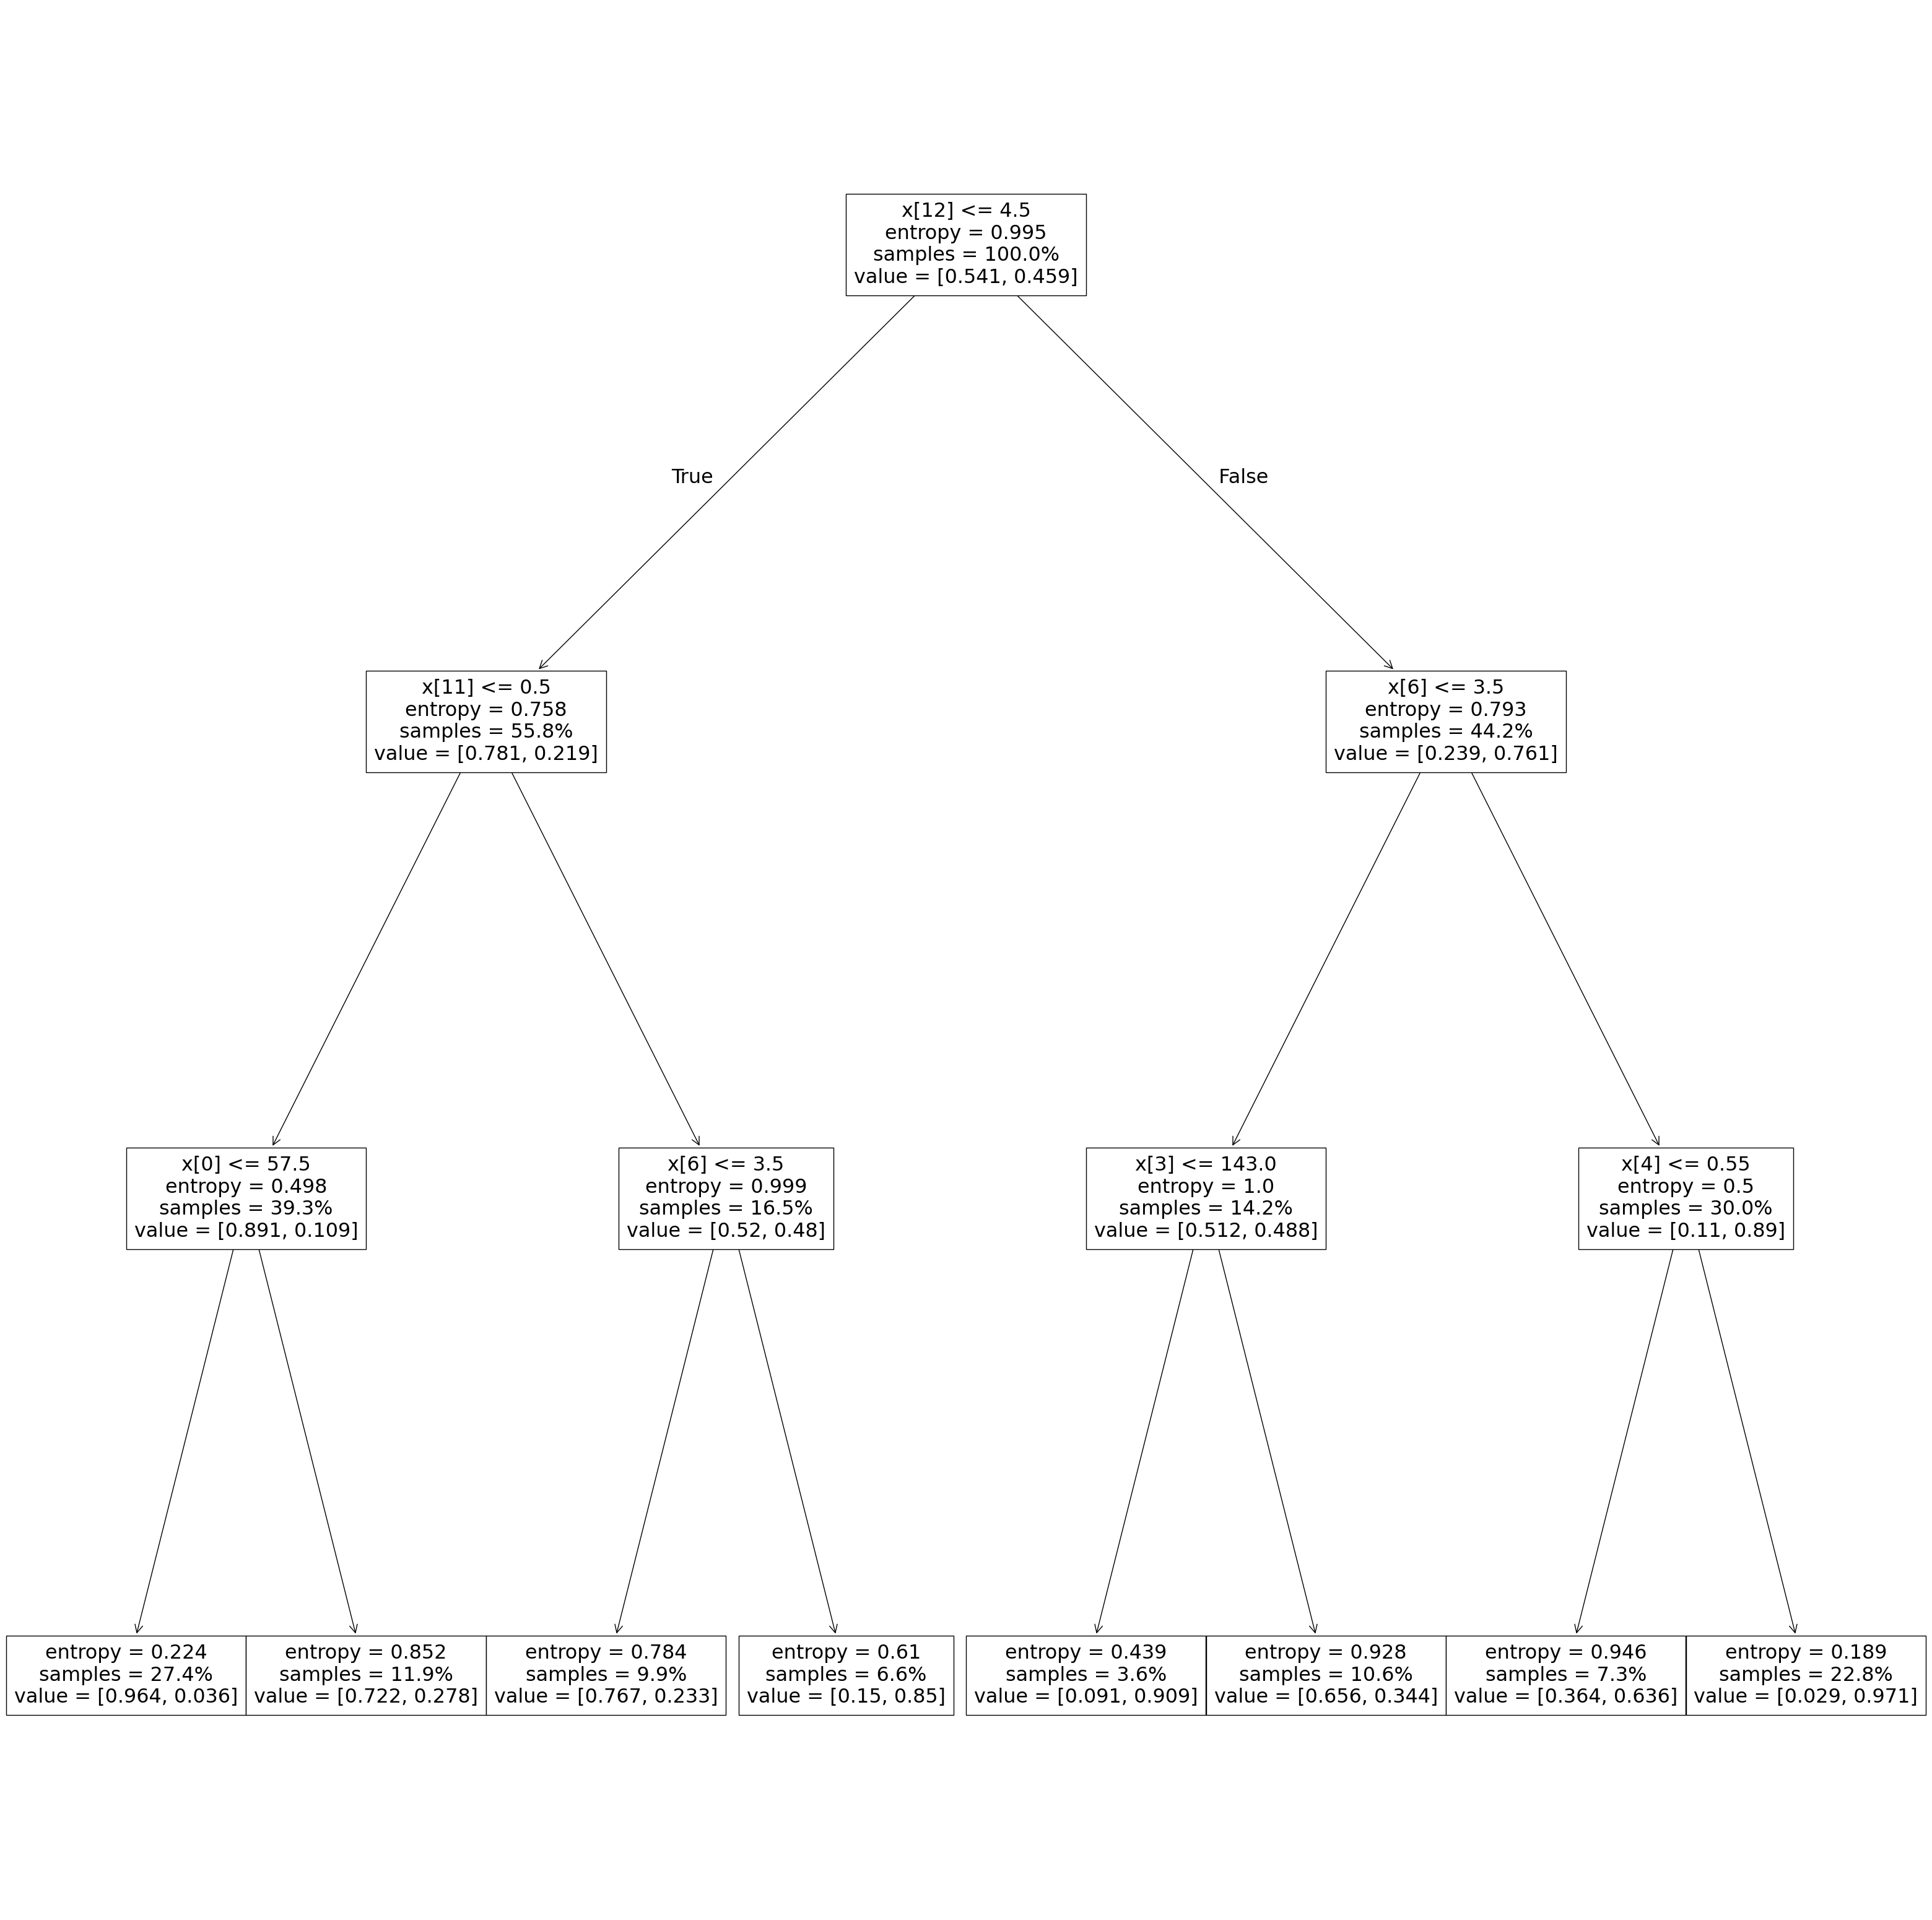

In [62]:
# plot your tree here.
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 40))
tree.plot_tree(final_tree, proportion=True)
plt.show()


The most important combination of features are x12, x11 and x6 as these are the features at the top of the tree and so most (all for x12) of the data passes through those filters. 